In [69]:
import pandas as pd
divorce = pd.read_csv('data/Marriage_Divorce_DB.csv')

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression             
from sklearn.model_selection import train_test_split      
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error, r2_score 

In [11]:
def plot_pred(y_true, y_pred, title):
    plt.figure()
    
    # Scatter actual vs. predicted
    plt.scatter(y_true, y_pred, alpha=0.5, label='Predictions')

    # Fit a regression line
    coeffs = np.polyfit(y_true, y_pred, deg=1)
    line = np.poly1d(coeffs)
    x_vals = np.linspace(y_true.min(), y_true.max(), 100)
    plt.plot(x_vals, line(x_vals), color='orange', linestyle='-', label='Best-fit line')

    # Labels & title
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
from sklearn.svm import SVR

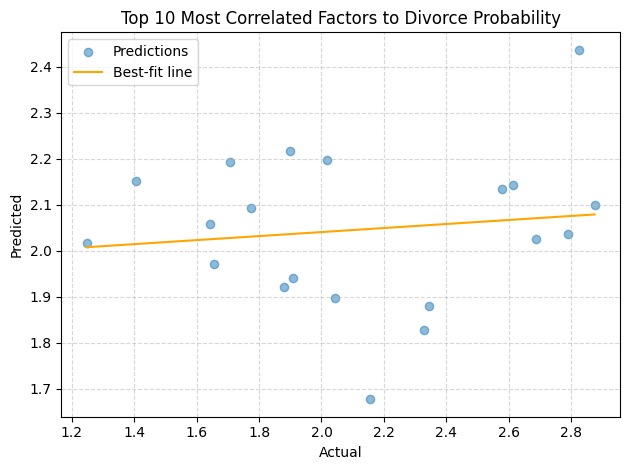

In [76]:
x = divorce[['Addiction', 'Love', 'Age Gap', 'Mental Health', 'Independency', 'Relation with Non-spouse Before Marriage', 'Loyalty', 'Spouse Confirmed by Family', 'Divorce in the Family of Grade 1', 'Social Gap']]
y = divorce['Divorce Probability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23)
model = RandomForestRegressor(random_state = 23)
model.fit(x_train, y_train)

y_pred_top10= model.predict(x_test)
plot_pred(y_test, y_pred_top10, 'Top 10 Most Correlated Factors to Divorce Probability')

In [77]:
r2_top10 = r2_score(y_test, y_pred_top10)
mse_top10 = mean_squared_error(y_test, y_pred_top10)
print(f'r2: {r2_top10}\n mse: {mse_top10}')

r2: -0.0515961887997507
 mse: 0.2395830833639497


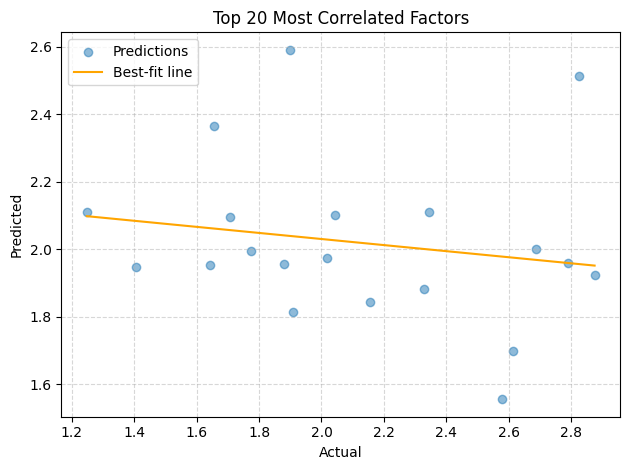

In [45]:
divorce = pd.read_csv("data/Marriage_Divorce_DB.csv")

# Drop low-correlation features
features_to_drop = ['Common Interests', 'The Sense of Having Children', 'Desire to Marry', 'The Proportion of Common Genes', 'Previous Trading', 'Relationship with the Spouse Family', 'Social Similarities', 'Start Socializing with the Opposite Sex Age ', 'Good Income', 'Education']
divorce_reduced = divorce.drop(columns=features_to_drop)


X = divorce_reduced.drop(columns=['Divorce Probability'])
y = divorce_reduced['Divorce Probability']                 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using matching features
y_pred = model.predict(X_test)
plot_pred(y_test, y_pred, 'Top 20 Most Correlated Factors')

In [46]:
r2_top20 = r2_score(y_test, y_pred)
mse_top20 = mean_squared_error(y_test, y_pred)
print(f'r2 = {r2_top20}\nmse = {mse_top20}')

r2 = -0.47842922057310333
mse = 0.33682761022987556


In [56]:
divorce_all = pd.read_csv('data/Marriage_Divorce_DB.csv')
x_all = divorce.drop(columns = ['Divorce Probability'])
y3 = divorce_all['Divorce Probability']

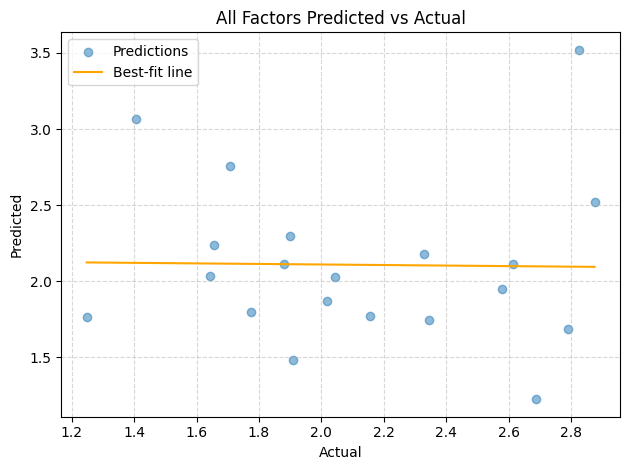

In [57]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_all, y3, test_size = 0.2, random_state = 23)
model_all = LinearRegression()
model_all.fit(x_train3, y_train3)

y_pred = model_all.predict(x_test3)
plot_pred(y_test3, y_pred, 'All Factors Predicted vs Actual')

In [58]:
r2_all = r2_score(y_test3, y_pred)
mse_all = mean_squared_error(y_test3, y_pred)
print(f'r2 = {r2_all}\nmse = {mse_all}')

r2 = -1.234770396544722
mse = 0.5091433269891935


In [ ]:
##another model

In [60]:
# Load and prepare your data
df = pd.read_csv('data/Marriage_Divorce_DB.csv')
X = df.drop(columns=['Divorce Probability'])   # features
y = df['Divorce Probability']                  # target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R²: -0.012914751680875858
Random Forest RMSE: 0.32975596860983875


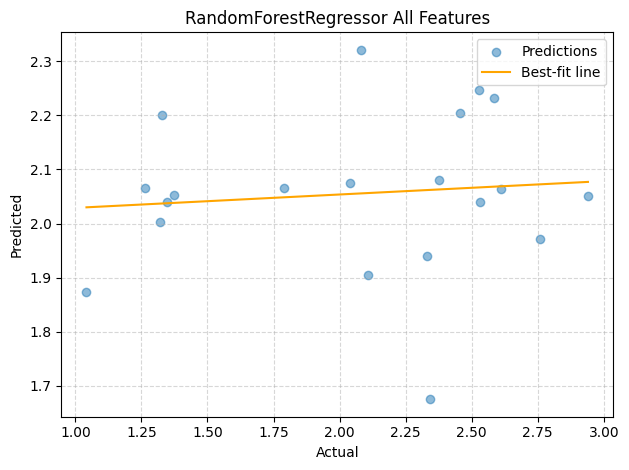

In [67]:
plot_pred(y_test, y_pred_rf, 'RandomForestRegressor All Features')

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", mean_squared_error(y_test, y_pred_gb))

Gradient Boosting R²: -0.05631497657208251
Gradient Boosting RMSE: 0.34388497914417604


***some code just taking all absolute value correlation***
***DOESNT WORK DONT USE***

In [71]:
corr_matrix = divorce.corr().abs().drop(columns = 'Divorce Probability')
top_10 = corr_matrix.stack().sort_values(ascending=False).head(10)
print(top_10)

Age Gap                                       Age Gap                                         1.0
Education                                     Education                                       1.0
Start Socializing with the Opposite Sex Age   Start Socializing with the Opposite Sex Age     1.0
Love                                          Love                                            1.0
Independency                                  Independency                                    1.0
Engagement Time                               Engagement Time                                 1.0
Self Confidence                               Self Confidence                                 1.0
Relation with Non-spouse Before Marriage      Relation with Non-spouse Before Marriage        1.0
Social Similarities                           Social Similarities                             1.0
Cultural Similarities                         Cultural Similarities                           1.0
dtype: float64


In [72]:
x = divorce[['Age Gap', 'Education', 'Start Socializing with the Opposite Sex Age ', 
            'Love', 'Independency', 'Engagement Time', 'Self Confidence', 'Relation with Non-spouse Before Marriage',
            'Social Similarities', 'Cultural Similarities']]

In [73]:
y = divorce['Divorce Probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest R²: -0.012914751680875858
Random Forest RMSE: 0.32975596860983875
